In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [134]:
def PageRank(G, alpha):
    it = 0
    delta = 1
    tol = 1e-8

    R = G.shape[0]
    p_k_1 = p_0 = np.ones(R) / R

    d = (np.sum(G, axis=0) == 0).astype(int)

    P = (G + (1 / R) * d.transpose())
    P_prime = P / np.sum(P, axis=0)

    M = alpha * P_prime + (1 - alpha) * (1 / R)

    while delta > tol:
        p_k = M @ p_k_1
        delta = np.linalg.norm(p_k - p_k_1, 1)
        p_k_1 = p_k
        it += 1

    return p_k, it

In [135]:
def PageRankSparse(G, alpha):
    it = 0
    delta = 1
    tol = 1e-8

    R = G.shape[0]
    p_k_1 = p_0 = np.ones(R) / R

    d = (np.array(G.sum(axis=0)).flatten() == 0).astype(int)

    P = G + d
    P_prime = P / P.sum(axis=0)

    while delta > tol:
        p_k = alpha * np.array(P_prime.dot(p_k_1)).flatten() + (1 - alpha) * (1 / R)
        delta = np.linalg.norm(p_k - p_k_1, 1)
        p_k_1 = p_k
        it += 1

    return p_k, it

In [136]:
G = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
alpha = 0.9

In [137]:
(p, it) = PageRank(G, alpha)
print(p, it)

[0.03885066 0.03993066 0.07381625 0.06248823 0.03288854 0.04002228
 0.06349601 0.09892554 0.10291725 0.06380141 0.02088186 0.2137178
 0.11537496 0.03288854] 24


Text(0.5, 1.0, 'Graph Sparsity Pattern')

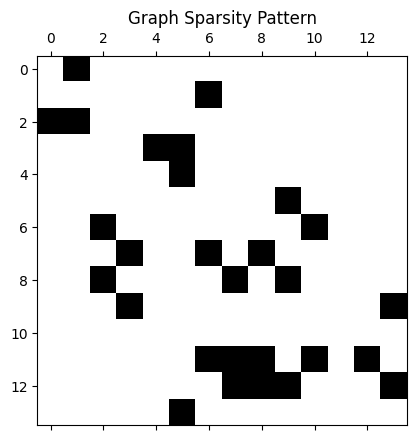

In [138]:
plt.spy(G)
plt.title("Graph Sparsity Pattern")

Text(0, 0.5, 'PageRank Score')

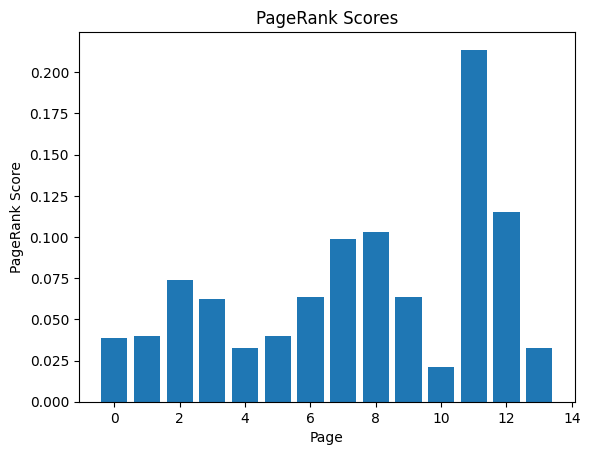

In [139]:
plt.bar(range(len(p)), p)
plt.title("PageRank Scores")
plt.xlabel("Page")
plt.ylabel("PageRank Score")

In [140]:
(p, it) = PageRankSparse(csr_matrix(G), alpha)
print(p, it)

[0.03885066 0.03993066 0.07381625 0.06248823 0.03288854 0.04002228
 0.06349601 0.09892554 0.10291725 0.06380141 0.02088186 0.2137178
 0.11537496 0.03288854] 24


Text(0.5, 1.0, 'Graph Sparsity Pattern')

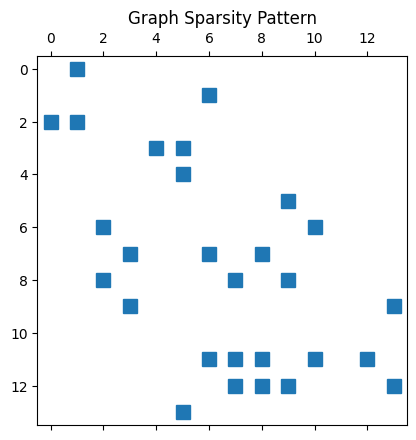

In [142]:
plt.spy(csr_matrix(G))
plt.title("Graph Sparsity Pattern")

Text(0, 0.5, 'PageRank Score')

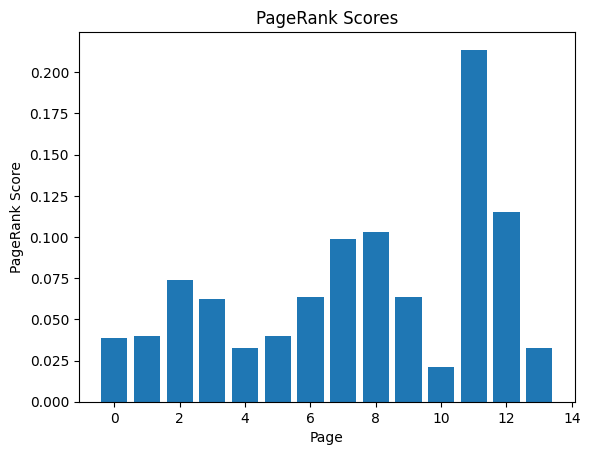

In [143]:
plt.bar(range(len(p)), p)
plt.title("PageRank Scores")
plt.xlabel("Page")
plt.ylabel("PageRank Score")

In [144]:
import scipy.io

In [145]:
data = scipy.io.loadmat('bbc.mat')

In [147]:
Gcsr = data['G']
Gcsr = Gcsr.transpose() #data uses the reverse adjacency matrix convention.
U = data['U']

In [154]:
(p, it) = PageRankSparse(Gcsr, alpha)
print(p, it)

[0.07021503 0.0002     0.0002     0.0002     0.0002     0.0002
 0.0002     0.00828606 0.01143905 0.00264369 0.00892974 0.00490849
 0.00316118 0.00590305 0.01349519 0.0007828  0.00992243 0.00229424
 0.0137692  0.00988145 0.00247424 0.00229424 0.01575963 0.00107877
 0.0002     0.0002     0.0002     0.00036364 0.00200458 0.00080389
 0.0002     0.00079379 0.00038    0.0006804  0.00738395 0.00626014
 0.00067759 0.00083833 0.00386073 0.00386073 0.00421611 0.00533527
 0.00386073 0.01006308 0.01282385 0.00136982 0.00600617 0.00118718
 0.00555281 0.00386073 0.01260217 0.01072217 0.00717643 0.01147123
 0.00612586 0.0122313  0.01143085 0.00178077 0.01274276 0.00744724
 0.00828606 0.00417753 0.00488933 0.0002     0.0002     0.00177791
 0.00041416 0.00033128 0.00262422 0.01143905 0.01143905 0.01143905
 0.01143905 0.01143905 0.01143905 0.0002     0.00021488 0.0002
 0.0002     0.00023656 0.00028991 0.00021488 0.0002     0.00036659
 0.00028991 0.00229424 0.00229424 0.00229424 0.00040033 0.00028991
 0.

Text(0.5, 1.0, 'Graph Sparsity Pattern')

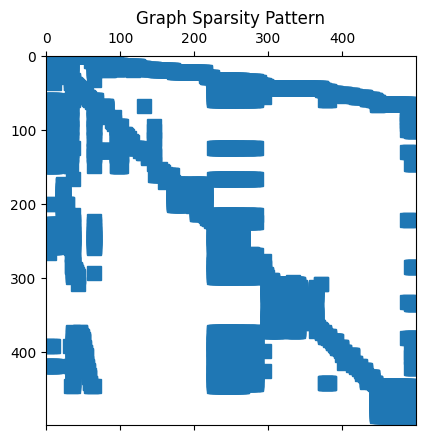

In [155]:
plt.spy(Gcsr)
plt.title("Graph Sparsity Pattern")

Text(0, 0.5, 'PageRank Score')

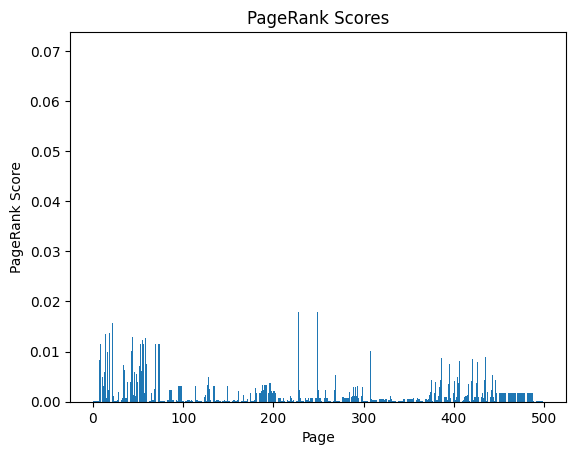

In [156]:
plt.bar(range(len(p)), p)
plt.title("PageRank Scores")
plt.xlabel("Page")
plt.ylabel("PageRank Score")

In [169]:
[val[0][0] for val in U[np.argsort(p)[-20:]]]

['https://www.bbc.com/news/world-europe-45902014',
 'https://www.bbc.com/news/world-latin-america-45944164',
 'http://bbc.in/2rAX81O',
 'http://www.bbc.com/travel/columns/culinary-roots',
 'http://www.bbc.com/travel/columns/welcome-to-our-house',
 'http://www.bbc.com/travel/columns/to-the-ends-of-the-earth',
 'http://www.bbc.com/travel',
 'http://bbc.in/2s4bidh',
 'http://www.bbc.com/travel/columns/travel-journeys',
 'https://www.bbc.com/news/business-45961761',
 'https://www.bbc.com/news/uk-politics-45948282',
 'https://www.bbc.com/news/education-45979234',
 'https://www.bbc.com/news/business-45939984',
 'https://www.bbcgoodfood.com',
 'http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work',
 'http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language',
 'http://www.bbcamerica.com',
 'https://www.bbc.co.uk/news',
 'https://www.bbc.com/news',
 'http://www.bbc.com']